In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import gensim
from sklearn.manifold import TSNE
cd = 'C:\\Users\\Giada\\Documents\\GitHub\\Tweet-Sentiment-Predictor'

In [7]:
df = pd.read_csv('Tweets_Combined.csv', low_memory=False)

In [8]:
#Transforming the dataset of words in a list of tweets where each tweet is comprised of a 
#list of the tweets individual words.
df.pop('SCORE')
Row_list = []
for i in range((df.shape[0])): 
    cleanedList = [x for x in list(df.iloc[i, :]) if str(x) != 'nan']
    Row_list.append(list(cleanedList))

#Training the word2vec model 
w2vmodel  =  gensim.models.Word2Vec(window=2,
                                    min_count=10,
                                    sg=0,
                                    alpha=0.025,
                                    size=100,
                                    )
w2vmodel.build_vocab(Row_list)  # prepare the model vocabulary
w2vmodel.train(sentences=Row_list, total_examples=len(Row_list), epochs=w2vmodel.epochs)
w2vmodel.save('w2vmodel')

#For checks for testing the strength of the word2vec
print(w2vmodel)
print("")
print(w2vmodel.wv.most_similar("brilliant",topn=10))
print("")
print(w2vmodel.wv.doesnt_match(["good","great","fantastic","bad"]))

Word2Vec(vocab=11793, size=100, alpha=0.025)

[('superb', 0.9118999242782593), ('fantastic', 0.8939509987831116), ('amazing', 0.8677588701248169), ('incredible', 0.819749653339386), ('great', 0.7956488728523254), ('impressive', 0.7887656092643738), ('fabulous', 0.7726180553436279), ('fox', 0.771273672580719), ('wonderful', 0.7687187790870667), ('awesome', 0.7424630522727966)]

bad


C:\Users\Giada\AppData\Local\Programs\Python\Python37-32\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [4]:
#Code to plot the word2vec model
#This code is very slow if the word2vec min count is low (~500 to get effective results)
def tsne_plot(w2vmodel):

    #Putting the feature vectors and word labels for each word into a 1d array
    W2V_matrix = []
    labels = []
    for word in w2vmodel.wv.vocab:
        W2V_matrix.append(w2vmodel[word])
        labels.append(word)

    #TSNE converts the word2vec large matrix into 2 dimensions (if n_components=2) - coordinates[i][0=x,1=y] 
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=1)
    coordinates = tsne_model.fit_transform(W2V_matrix)    

    #Uses matlibplot to plot the word2vec
    plt.figure(figsize=(10, 10)) 
    for i in range(len(coordinates)):
        plt.scatter(coordinates[i][0],coordinates[i][1])
        plt.annotate(labels[i],
                     xy=(coordinates[i][0], coordinates[i][1]),
                     xytext=(5, 2),
                     textcoords='offset points')
    plt.show()

C:\Users\Giada\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


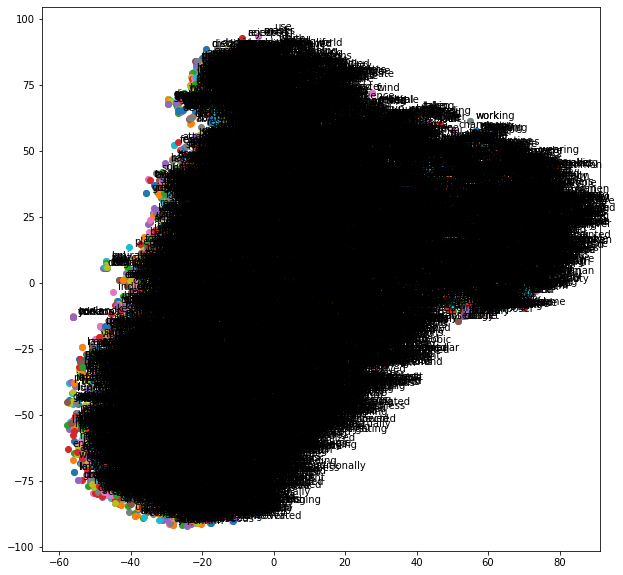

In [9]:
#Visualisation of word2vec run with min count at 10
tsne_plot(w2vmodel)

C:\Users\Giada\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


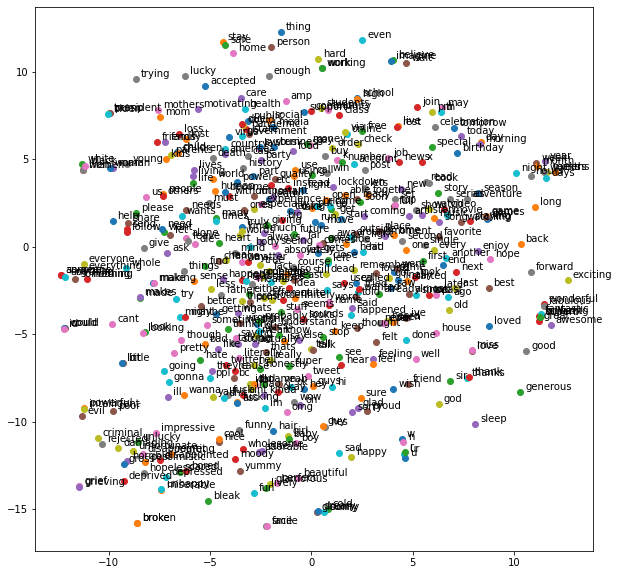

In [5]:
#Visualisation of word2vec run with min count at 500
tsne_plot(w2vmodel)

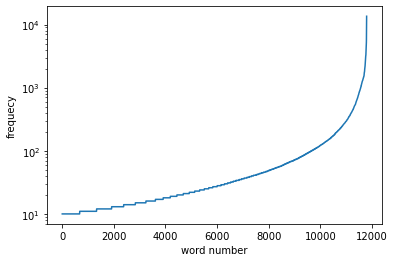

In [10]:
w2vmodel = gensim.models.KeyedVectors.load('w2vmodel')

#Loading all the values form the word2vec into a dictionary and sorting them based on their frequency
w2c = dict()
for item in w2vmodel.wv.vocab:
    w2c[item]=w2vmodel.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key = lambda x : x[1],reverse=True))

#Used as a word frequency cut-off if necessary
"""
for key, value in dict(w2cSorted).items():
    if value < 100:
        del w2cSorted[key] 
words = w2cSorted.keys()
"""

#Changing the format of the frequency of words from a dictionary to a list to be used in the graph
dict_frequency = w2cSorted.values()
frequency = list(dict_frequency)

#Creating a scale 1,2,3... as a x-axis for the graph representing the "word number"
word_number = list()
for i in range(len(frequency)):
	word_number.append(len(frequency) - i)

#Plotting the graph
fig = plt.plot(word_number,frequency)
fig = plt.yscale(value="log")
fig = plt.xlabel("word number")
fig = plt.ylabel("frequecy")
plt.show()
